In [952]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [953]:
right_hand_data = pd.read_csv('C:\hand_sync\HandRight.csv')

In [954]:
right_hand_data.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


### We need to remove the first 7 seconds

In [955]:
start = right_hand_data.iloc[0]["Time"]
right_hand_data.drop(right_hand_data[right_hand_data.Time<start+7].index, inplace=True)

In [956]:
right_hand_data.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
421,135.3024,16287,right,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,-57.68153,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.0167,201.9318,0.0,0.561324,0.0
422,135.3194,16289,right,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,-77.18515,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.9712,203.6773,0.0,0.626321,0.0
423,135.3357,16291,right,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,-43.79815,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.5401,206.7526,0.0,0.636596,0.0
424,135.3524,16293,right,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,-43.99948,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.1382,209.9330,0.0,0.701644,0.0
425,135.3690,16295,right,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,-53.88054,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.5215,212.1112,0.0,0.786548,0.0


In [957]:
right_hand_data[" Hand Type"].value_counts()

right    4317
left       74
Name:  Hand Type, dtype: int64

In [958]:
right_hand_data = right_hand_data[right_hand_data[" Hand Type"] == 'right']

In [959]:
right_hand_data[" Hand Type"].value_counts()

right    4317
Name:  Hand Type, dtype: int64

In [960]:
right_hand_data.isnull().sum()

Time                 0
 Frame ID            0
 Hand Type           0
 # hands             0
 Position X          0
 Position Y          0
 Position Z          0
 Velocity X          0
 Velocity Y          0
 Velocity Z          0
 Pitch               0
 Roll                0
 Yaw                 0
 Wrist Pos X       384
 Wrist Pos Y       384
 Wrist Pos Z       384
 Elbow pos X       384
 Elbow Pos Y       384
 Elbow Pos Z       384
 Grab Strenth        0
 Grab Angle          0
 Pinch Strength      0
dtype: int64

In [961]:
right_hand_data.dropna(inplace=True)

### Uploading datasets

In [962]:
evyatar_spontan = pd.read_csv(r"C:\hand_sync\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv")
evyatar_sync = pd.read_csv(r"C:\hand_sync\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv")
evyatar_alone = pd.read_csv(r"C:\hand_sync\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv")

nofar_spontan = pd.read_csv(r"C:\hand_sync\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv")
nofar_sync = pd.read_csv(r"C:\hand_sync\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv")
nofar_alone = pd.read_csv(r"C:\hand_sync\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv")

oriya_spontan = pd.read_csv(r"C:\hand_sync\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv")
oriya_sync = pd.read_csv(r"C:\hand_sync\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv")
oriya_alone = pd.read_csv(r"C:\hand_sync\Training\Oriya Social_Nuero\Oriya636759805268396661Alone.csv")

orya_spontan = pd.read_csv(r"C:\hand_sync\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv") 
orya_sync = pd.read_csv(r"C:\hand_sync\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv") 
orya_alone = pd.read_csv(r"C:\hand_sync\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv")

revital_spontan = pd.read_csv(r"C:\hand_sync\Training\Revital Marbel\Revital636770957038873193Spontan.csv")
revital_sync = pd.read_csv(r"C:\hand_sync\Training\Revital Marbel\Revital636770957894370062Sync.csv")
revital_alone = pd.read_csv(r"C:\hand_sync\Training\Revital Marbel\Revital636770955999435879Alone.csv")

shahar_spontan = pd.read_csv(r"C:\hand_sync\Training\Shahar Terner\Sachar636771045591258071Spontan.csv")
shahar_sync = pd.read_csv(r"C:\hand_sync\Training\Shahar Terner\Sachar636771046527112972Sync.csv")
shahar_alone = pd.read_csv(r"C:\hand_sync\Training\Shahar Terner\Sachar636771047408504303Alone.csv")

shelly_spontan = pd.read_csv(r"C:\hand_sync\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv")
shelly_sync = pd.read_csv(r"C:\hand_sync\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv")
shelly_alone = pd.read_csv(r"C:\hand_sync\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv")

yael_spontan = pd.read_csv(r"C:\hand_sync\Training\Yael Hagai\Yael636771059544754823Spontan.csv")
yael_sync = pd.read_csv(r"C:\hand_sync\Training\Yael Hagai\Yael636771060699529085Sync.csv")
yael_alone = pd.read_csv(r"C:\hand_sync\Training\Yael Hagai\Yael636771061659067649Alone.csv")

yoel_spontan = pd.read_csv(r"C:\hand_sync\Training\Yoel Raz\Yoel636760921663075813Spontan.csv")
yoel_sync = pd.read_csv(r"C:\hand_sync\Training\Yoel Raz\Yoel636760923490742912Sync.csv")
yoel_alone = pd.read_csv(r"C:\hand_sync\Training\Yoel Raz\Yoel636760922573364655Alone.csv")


In [963]:
spontans = [evyatar_spontan,nofar_spontan,oriya_spontan,orya_spontan,revital_spontan,shahar_spontan,shelly_spontan,yael_spontan,yoel_spontan]
syncs = [evyatar_sync,nofar_sync,oriya_sync,orya_sync,revital_sync,shahar_sync,shelly_sync,yael_sync,yoel_sync]
alones = [evyatar_alone,nofar_alone,oriya_alone,orya_alone,revital_alone,shahar_alone,shelly_alone,yael_alone,yoel_alone]

for i in range(9):
    spontans[i].insert(loc=1, column = 'state', value=0)
    syncs[i].insert(loc=1, column = 'state', value=1)
    alones[i].insert(loc=1, column = 'state', value=2)

In [964]:
def merge_dfs(l):
    ret = l
    for i in range(len(l)):
        df = l[i]
        start = df.iloc[0]["Time"]
        df.drop(df[df.Time<start+7].index, inplace=True)
        right = df.groupby(df[" Hand Type"]).get_group("right")
        left = df.groupby(df[" Hand Type"]).get_group("left")
        df = pd.merge(left, right, how="left", on=" Frame ID")
        ret[i] = df
    return pd.concat(ret)
        

In [965]:
df_spontans = merge_dfs(spontans)
df_syncs = merge_dfs(syncs)

In [966]:
df_spontans.head()

,Time_x,state_x,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,343.0061,0,129364,left,2,-102.2870,198.3166,-2.122641,-174.57210,379.1468,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,343.0227,0,129365,left,2,-103.8721,201.4944,-2.063620,-178.50250,357.8548,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,343.0392,0,129367,left,2,-106.3691,207.4667,-2.337110,-126.78780,318.5284,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,343.0558,0,129369,left,2,-107.9509,212.1324,-2.788956,-74.28078,244.4823,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,343.0723,0,129371,left,2,-109.5427,216.8003,-3.337280,-96.49666,269.5434,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000


In [967]:
def merge_dfs_alone(l):
    ret = l
    for i in range(len(l)):
        df = l[i]
        start = df.iloc[0]["Time"]
        df.drop(df[df.Time<start+7].index, inplace=True)
        df = df[df[" Hand Type"] == "left"]
        right_df = right_hand_data[right_hand_data[" Hand Type"] == "right"].iloc[:len(df)]
        right_df = right_df.reset_index(drop=True)
        df.reset_index(drop = True)
        df = pd.merge(df, right_hand_data, left_index=True, right_index=True, how="left", on=" Frame ID")
        ret[i] = df
    return pd.concat(ret)

In [968]:
df_alones = merge_dfs_alone(alones)

In [969]:
df_alones.head()

,Time_x,state,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
423,525.8185,2,150428,left,1,-52.96039,184.5535,-2.856696,162.15270,127.60520,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.5401,206.7526,0.0,0.636596,0.0
424,525.8351,2,150430,left,1,-50.04434,185.5024,-4.845364,102.82480,-24.84337,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.1382,209.9330,0.0,0.701644,0.0
425,525.8516,2,150432,left,1,-49.07749,182.2930,-6.442950,12.12360,-258.75260,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.5215,212.1112,0.0,0.786548,0.0
426,525.8682,2,150434,left,1,-50.89614,176.7708,-9.005262,-53.57292,-271.01500,...,-0.892533,72.37645,180.5758,41.30936,277.8844,155.1636,213.4511,0.0,0.816478,0.0
427,525.8848,2,150436,left,1,-51.76074,174.1853,-10.600340,-40.95883,-140.44390,...,-0.885613,71.86523,176.4819,40.54097,276.7695,157.4658,214.2207,0.0,0.845672,0.0


In [970]:
df_alones[" Hand Type_x"].value_counts()

left    34236
Name:  Hand Type_x, dtype: int64

### removing not needed features

In [971]:
df_spontans.columns

Index(['Time_x', 'state_x', ' Frame ID', ' Hand Type_x', ' # hands_x',
       ' Position X_x', ' Position Y_x', ' Position Z_x', ' Velocity X_x',
       ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x',
       ' Wrist Pos X_x', ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x',
       ' Elbow Pos Y_x', ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', 'state_y', ' Hand Type_y', ' # hands_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y', ' Velocity X_y',
       ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y', ' Roll_y', ' Yaw_y',
       ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Wrist Pos Z_y', ' Elbow pos X_y',
       ' Elbow Pos Y_y', ' Elbow Pos Z_y', ' Grab Strenth_y', ' Grab Angle_y',
       ' Pinch Strength_y'],
      dtype='object')

In [972]:
drop = [" Frame ID","Time_x", "Time_y", " Hand Type_x", " Hand Type_y", " # hands_x", " # hands_y", "state_y"]
df_spontans.drop(drop, axis = 1, inplace = True)
df_syncs.drop(drop, axis = 1, inplace = True)


In [973]:
df_alones.columns

Index(['Time_x', 'state', ' Frame ID', ' Hand Type_x', ' # hands_x',
       ' Position X_x', ' Position Y_x', ' Position Z_x', ' Velocity X_x',
       ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x',
       ' Wrist Pos X_x', ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x',
       ' Elbow Pos Y_x', ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y', ' # hands_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y', ' Velocity X_y',
       ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y', ' Roll_y', ' Yaw_y',
       ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Wrist Pos Z_y', ' Elbow pos X_y',
       ' Elbow Pos Y_y', ' Elbow Pos Z_y', ' Grab Strenth_y', ' Grab Angle_y',
       ' Pinch Strength_y'],
      dtype='object')

In [974]:
drop_alone = [" Frame ID","Time_x", "Time_y", " Hand Type_x", " Hand Type_y", " # hands_x", " # hands_y"]
df_alones.drop(drop_alone, axis=1,inplace=True)

In [975]:
df_spontans.head()

,state_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,0,-102.2870,198.3166,-2.122641,-174.57210,379.1468,28.479910,1.423625,0.510471,1.481006,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,0,-103.8721,201.4944,-2.063620,-178.50250,357.8548,6.646493,1.429039,0.500107,1.486744,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,0,-106.3691,207.4667,-2.337110,-126.78780,318.5284,-12.872290,1.441357,0.489946,1.496526,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,0,-107.9509,212.1324,-2.788956,-74.28078,244.4823,-30.771300,1.444497,0.483316,1.499930,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,0,-109.5427,216.8003,-3.337280,-96.49666,269.5434,-37.723870,1.431969,0.488396,1.491886,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000


In [976]:
df_spontans = df_spontans.rename(columns={"state_x":"state"})
df_syncs = df_syncs.rename(columns={"state_x":"state"})

In [977]:
train_data = pd.concat([df_spontans, df_syncs, df_alones], axis = 0)

In [978]:
train_data.isna().sum()

state                   0
 Position X_x           0
 Position Y_x           0
 Position Z_x           0
 Velocity X_x           0
 Velocity Y_x           0
 Velocity Z_x           0
 Pitch_x                0
 Roll_x                 0
 Yaw_x                  0
 Wrist Pos X_x          0
 Wrist Pos Y_x          0
 Wrist Pos Z_x          0
 Elbow pos X_x          0
 Elbow Pos Y_x          0
 Elbow Pos Z_x          0
 Grab Strenth_x         0
 Grab Angle_x           0
 Pinch Strength_x       0
 Position X_y        2280
 Position Y_y        2280
 Position Z_y        2280
 Velocity X_y        2280
 Velocity Y_y        2280
 Velocity Z_y        2280
 Pitch_y             2280
 Roll_y              2280
 Yaw_y               2280
 Wrist Pos X_y       2280
 Wrist Pos Y_y       2280
 Wrist Pos Z_y       2280
 Elbow pos X_y       2280
 Elbow Pos Y_y       2280
 Elbow Pos Z_y       2280
 Grab Strenth_y      2280
 Grab Angle_y        2280
 Pinch Strength_y    2280
dtype: int64

In [979]:
train_data = train_data.fillna(0)

In [980]:
train_data.head()

,state,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,0,-102.2870,198.3166,-2.122641,-174.57210,379.1468,28.479910,1.423625,0.510471,1.481006,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,0,-103.8721,201.4944,-2.063620,-178.50250,357.8548,6.646493,1.429039,0.500107,1.486744,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,0,-106.3691,207.4667,-2.337110,-126.78780,318.5284,-12.872290,1.441357,0.489946,1.496526,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,0,-107.9509,212.1324,-2.788956,-74.28078,244.4823,-30.771300,1.444497,0.483316,1.499930,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,0,-109.5427,216.8003,-3.337280,-96.49666,269.5434,-37.723870,1.431969,0.488396,1.491886,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000


In [981]:
train_data.columns

Index(['state', ' Position X_x', ' Position Y_x', ' Position Z_x',
       ' Velocity X_x', ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x',
       ' Roll_x', ' Yaw_x', ' Wrist Pos X_x', ' Wrist Pos Y_x',
       ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x', ' Elbow Pos Z_x',
       ' Grab Strenth_x', ' Grab Angle_x', ' Pinch Strength_x',
       ' Position X_y', ' Position Y_y', ' Position Z_y', ' Velocity X_y',
       ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y', ' Roll_y', ' Yaw_y',
       ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Wrist Pos Z_y', ' Elbow pos X_y',
       ' Elbow Pos Y_y', ' Elbow Pos Z_y', ' Grab Strenth_y', ' Grab Angle_y',
       ' Pinch Strength_y'],
      dtype='object')

## Vizualization

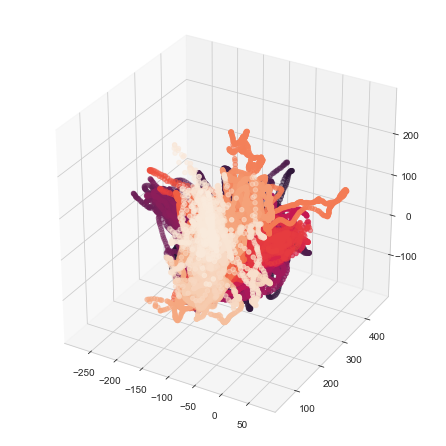

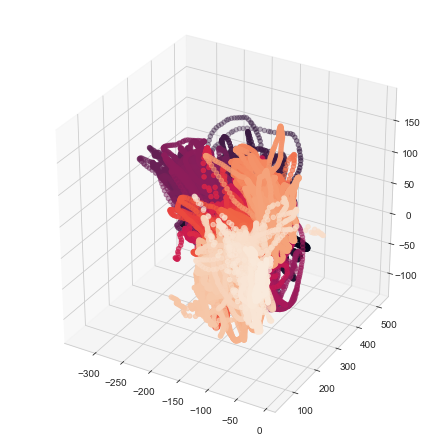

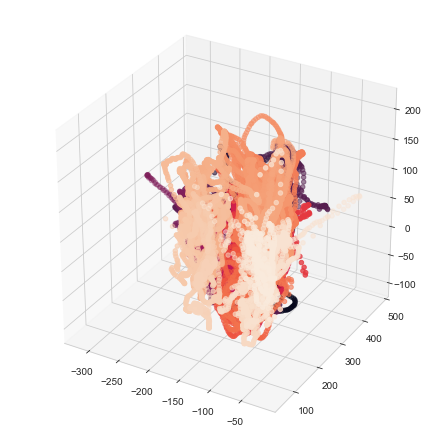

In [982]:
sns.set_style("whitegrid", {'axes.grid' : False})
f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
x = train_data.loc[train_data["state"]==2][" Position X_x"]
y = train_data.loc[train_data["state"]==2][" Position Y_x"]
z = train_data.loc[train_data["state"]==2][" Position Z_x"]
a = np.arange(34236)
ax.scatter(x,y,z, c=a,marker = 'o')


f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
x1 = train_data.loc[train_data["state"]==1][" Position X_x"]
y1 = train_data.loc[train_data["state"]==1][" Position Y_x"]
z1 = train_data.loc[train_data["state"]==1][" Position Z_x"]
a = np.arange(34065)
ax.scatter(x1,y1,z1, c=a,marker = 'o')


f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
x2 = train_data.loc[train_data["state"]==0][" Position X_x"]
y2 = train_data.loc[train_data["state"]==0][" Position Y_x"]
z2 = train_data.loc[train_data["state"]==0][" Position Z_x"]
a = np.arange(34486)
ax.scatter(x2,y2,z2, c=a,marker = 'o')

In [983]:
train_data.state.value_counts()

0    34486
2    34236
1    34065
Name: state, dtype: int64

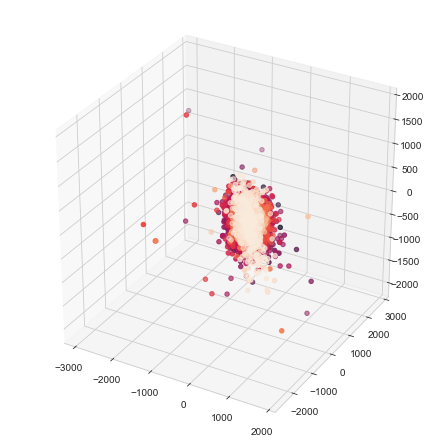

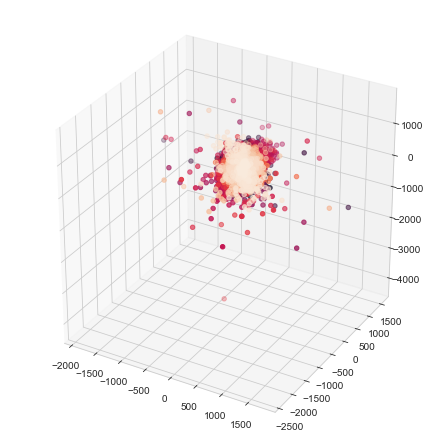

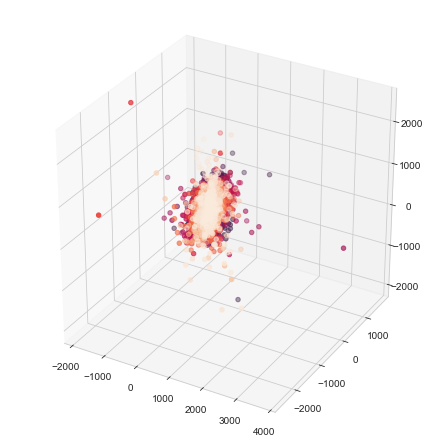

In [984]:
sns.set_style("whitegrid", {'axes.grid' : False})
f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
x = train_data.loc[train_data["state"]==2][" Velocity X_x"]
y = train_data.loc[train_data["state"]==2][" Velocity Y_x"]
z = train_data.loc[train_data["state"]==2][" Velocity Z_x"]
a = np.arange(34236)
ax.scatter(x,y,z, c=a,marker = 'o')


f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
x1 = train_data.loc[train_data["state"]==1][" Velocity X_x"]
y1 = train_data.loc[train_data["state"]==1][" Velocity Y_x"]
z1 = train_data.loc[train_data["state"]==1][" Velocity Z_x"]
a = np.arange(34065)
ax.scatter(x1,y1,z1, c=a,marker = 'o')


f = plt.figure(figsize=(6,6))
ax = Axes3D(f)
x2 = train_data.loc[train_data["state"]==0][" Velocity X_x"]
y2 = train_data.loc[train_data["state"]==0][" Velocity Y_x"]
z2 = train_data.loc[train_data["state"]==0][" Velocity Z_x"]
a = np.arange(34486)
ax.scatter(x2,y2,z2, c=a,marker = 'o')

## Train and Test

In [985]:
itiel_spontan = pd.read_csv(r"C:\hand_sync\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv")
itiel_sync = pd.read_csv(r"C:\hand_sync\Validation\Itiel Lab\Itiel636770941638547912Sync.csv")
itiel_alone = pd.read_csv(r"C:\hand_sync\Validation\Itiel Lab\Itiel636770942529041679Alone.csv")

mor_spontan = pd.read_csv(r"C:\hand_sync\Validation\Mor SHerman\Mor636771064635567065Spontan.csv")
mor_sync = pd.read_csv(r"C:\hand_sync\Validation\Mor SHerman\Mor636771065531910215Sync.csv")
mor_alone = pd.read_csv(r"C:\hand_sync\Validation\Mor SHerman\Mor636771066407626524Alone.csv")


oded_spontan = pd.read_csv(r"C:\hand_sync\Validation\Oded Medina\Oded636754670490266956Spontan.csv")
oded_sync = pd.read_csv(r"C:\hand_sync\Validation\Oded Medina\Oded636754671560850581Sync.csv")
oded_alone = pd.read_csv(r"C:\hand_sync\Validation\Oded Medina\Oded636754669540564461Alone.csv")

In [986]:
spontan_test = [itiel_spontan,mor_spontan,oded_spontan]
sync_test = [itiel_sync,mor_sync,oded_sync]
alone_test = [itiel_alone,mor_alone,oded_alone]

for i in range(3):
    spontan_test[i].insert(loc=1, column = 'state', value=0)
    sync_test[i].insert(loc=1, column = 'state', value=1)
    alone_test[i].insert(loc=1, column = 'state', value=2)

In [987]:
df_spontan_test = merge_dfs(spontan_test)
df_sync_test = merge_dfs(sync_test)
df_alone_test = merge_dfs_alone(alone_test)

In [988]:
df_spontan_test.drop(drop,axis=1, inplace=True)
df_sync_test.drop(drop,axis=1, inplace=True)
df_alone_test.drop(drop_alone,axis=1, inplace=True)

In [989]:
df_spontan_test = df_spontan_test.rename(columns={"state_x":"state"})
df_sync_test = df_sync_test.rename(columns={"state_x":"state"})

In [990]:
test_data = pd.concat([df_spontan_test, df_sync_test, df_alone_test], axis = 0)

In [991]:
test_data = test_data.fillna(0)

In [992]:
x = train_data.drop(["state"], axis=1)
y = train_data["state"]

In [993]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,random_state = 42)

## PCA

In [994]:
pca = PCA(n_components = 0.9)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

10


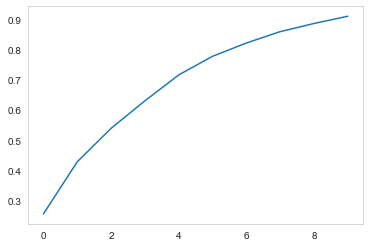

In [995]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(pca.n_components_)

In [996]:
scaling_pipeline = Pipeline(
[
    ('std_scaler', StandardScaler()),
    ('PCA',PCA(n_components = 0.9))
])

x_train = scaling_pipeline.fit_transform(x_train)
x_test = scaling_pipeline.transform(x_test)


## KNN

In [997]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
confusion_matrix(y_test,pred)

array([[3490,   12,    0],
       [  12, 3466,    0],
       [   2,    2, 3295]], dtype=int64)

0.9972759996108571


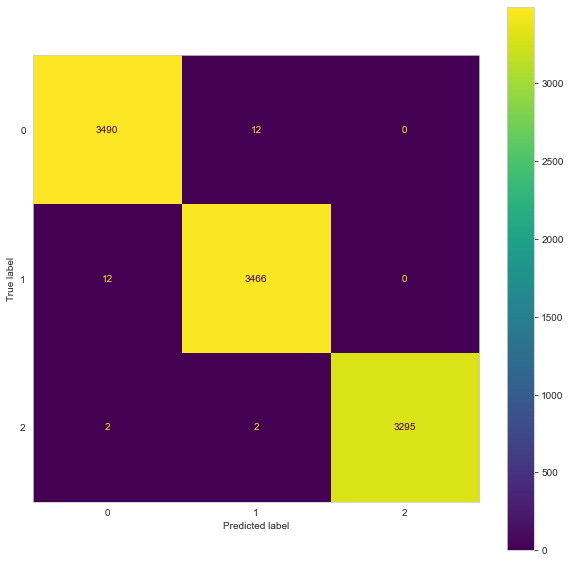

In [998]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,10)
plot_confusion_matrix(knn,x_test,y_test,ax=ax)
print(knn.score(x_test,y_test))

## Random forest

In [999]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 2, n_jobs = -1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=2)

In [1000]:
pred = rf.predict(x_test)
confusion_matrix(y_test,pred)

array([[3481,   18,    3],
       [  22, 3456,    0],
       [   2,    0, 3297]], dtype=int64)

0.9956221422317346


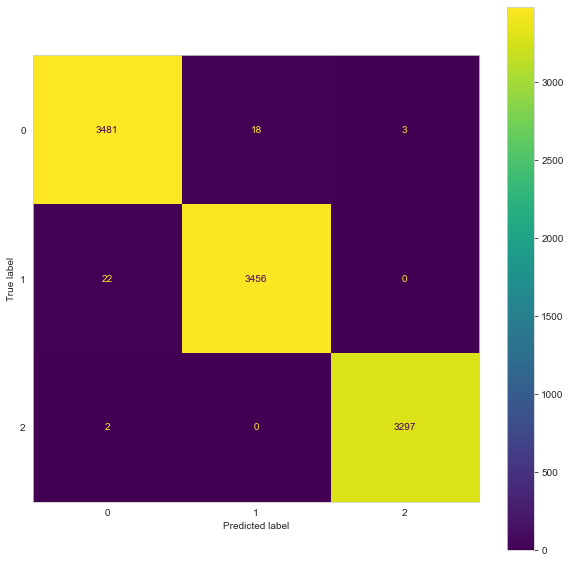

In [1001]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,10)
plot_confusion_matrix(rf,x_test,y_test,ax=ax)
print(rf.score(x_test,y_test))

## XGBOOST

In [1002]:
xgb = XGBClassifier(n_jobs = -1)
xgb.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1003]:
pred = xgb.predict(x_test)
confusion_matrix(y_test,pred)

array([[3458,   44,    0],
       [  39, 3438,    1],
       [   0,    0, 3299]], dtype=int64)

0.9918279988325712


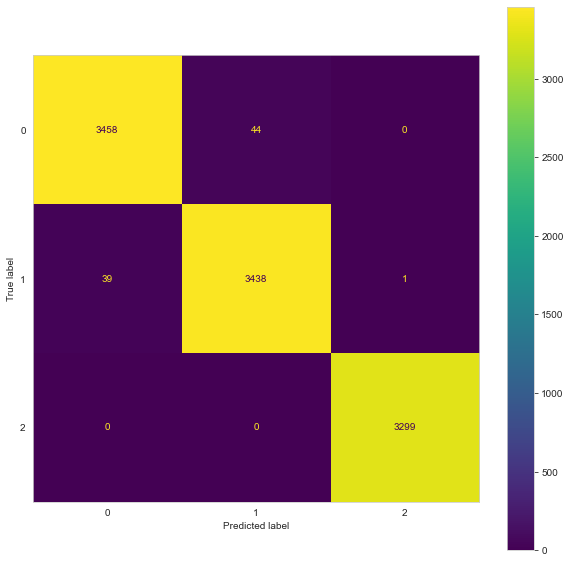

In [1004]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,10)
plot_confusion_matrix(xgb,x_test,y_test,ax=ax)
print(xgb.score(x_test,y_test))

## voting

In [1005]:
voting_clf = VotingClassifier(
    estimators=[('knn',knn),('rf',rf),('xgb',xgb)],
    voting = 'soft',
    weights=[4,2,1],
    n_jobs=-1
)
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
     

In [1006]:
pred = voting_clf.predict(x_test)
confusion_matrix(y_test,pred)

array([[3494,    8,    0],
       [  11, 3467,    0],
       [   2,    1, 3296]], dtype=int64)

0.9978597139799591


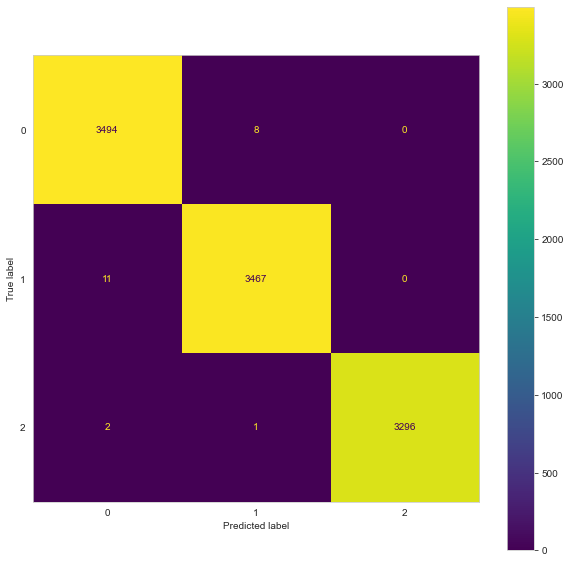

In [1007]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,10)
plot_confusion_matrix(voting_clf,x_test,y_test,ax=ax)
print(voting_clf.score(x_test,y_test))

In [1008]:
test_data.head()

,state,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,0,-159.3453,203.1198,28.14956,1.868645,37.01694,-11.42015,0.417738,2.161856,0.904842,...,-0.336620,164.3573,159.7095,25.43896,243.8085,-34.59677,163.7492,0.0,0.0,0.0
1,0,-158.8304,202.9772,27.92949,41.384500,-18.25130,-16.37026,0.394822,2.177706,0.898561,...,-0.344162,165.6616,161.6832,26.45107,247.7545,-32.00053,164.0902,0.0,0.0,0.0
2,0,-158.1558,202.7527,27.74698,47.141900,-20.65330,-14.79889,0.381070,2.201845,0.892868,...,-0.347686,167.0913,164.0732,27.55513,251.2191,-29.17511,164.5763,0.0,0.0,0.0
3,0,-157.6654,202.5851,27.59054,56.519950,-19.32211,-18.02981,0.377304,2.210599,0.890015,...,-0.345722,167.3190,164.5545,27.96732,252.6738,-28.27396,164.8209,0.0,0.0,0.0
4,0,-156.9311,202.3219,27.28152,35.349590,-13.85674,-14.19096,0.374588,2.224526,0.888334,...,-0.345081,167.7623,165.5259,28.97613,254.7319,-26.80494,165.5129,0.0,0.0,0.0


In [1009]:
test_data.columns

Index(['state', ' Position X_x', ' Position Y_x', ' Position Z_x',
       ' Velocity X_x', ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x',
       ' Roll_x', ' Yaw_x', ' Wrist Pos X_x', ' Wrist Pos Y_x',
       ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x', ' Elbow Pos Z_x',
       ' Grab Strenth_x', ' Grab Angle_x', ' Pinch Strength_x',
       ' Position X_y', ' Position Y_y', ' Position Z_y', ' Velocity X_y',
       ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y', ' Roll_y', ' Yaw_y',
       ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Wrist Pos Z_y', ' Elbow pos X_y',
       ' Elbow Pos Y_y', ' Elbow Pos Z_y', ' Grab Strenth_y', ' Grab Angle_y',
       ' Pinch Strength_y'],
      dtype='object')

In [1010]:
x = test_data.drop(["state"], axis=1)
y = test_data["state"]

In [1013]:
x = scaling_pipeline.transform(x)

In [1014]:
pred = voting_clf.predict(x)
confusion_matrix(y,pred)

array([[8844, 1325,   12],
       [2134, 7800,   46],
       [ 372,   26, 9794]], dtype=int64)

0.8710176918261786


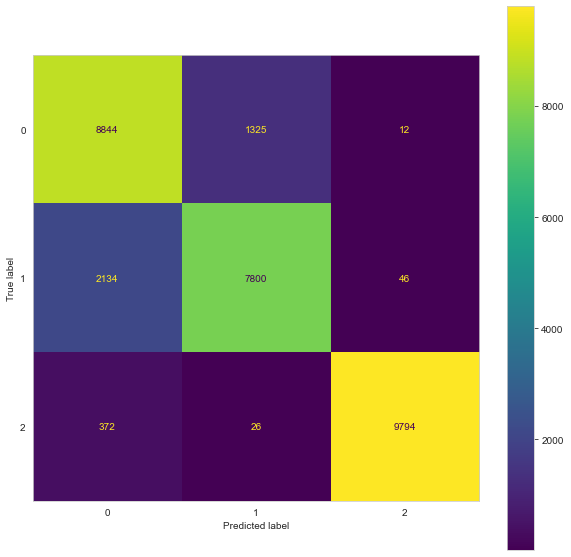

In [1016]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,10)
plot_confusion_matrix(voting_clf,x,y,ax=ax)
print(voting_clf.score(x,y))

### Ended up getting 87% using the voting classifier